#**Python Code Implementation of t-SNE on MNIST Dataset**


###mporting Necessary Modules.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


### load the MNIST dataset into pandas dataframe

In [46]:
# Reading the data using pandas
df = pd.read_csv('mnist_train.csv')

# print first five rows of df
print(df.head(4))


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  

[4 rows x 785 columns]


In [47]:
# Drop the label feature and
# store the pixel data in d.
d = df.drop("label", axis=1)


Before applying the t-SNE algorithm on the dataset we must standardize the data. As we know that the t-SNE algorithm is a complex algorithm which utilizes some comples non-linear methodologies to map the high dimensional data the lower dimensional it help us save some of the time complexity that will be needed to complete the process of reduction.



In [48]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(60000, 784)


Now let’s reduce the 784 columns data to 2 dimensions so, that we can create a scatter plot to visualize the same.



In [49]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]


In [50]:
# Assuming 'label' column exists in the original dataframe 'df'
labels = df['label']  # Extract labels from the original dataframe
labels_1000 = labels[0:1000]


In [51]:
model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000


In [52]:
tsne_data = model.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))


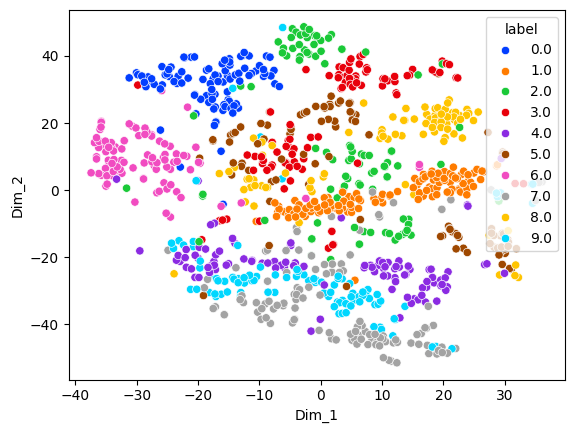

In [53]:
# Plotting the result of tsne
import seaborn as sn
import matplotlib.pyplot as plt
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()

#**Well Done , now it's your turne :)**